## Implementation of:
* The mahalanobis distance function
* Calculate_u for possibilistic k-means

## GOAL:
### Homework: Implement possibilistic k-means

Goal:
1. Implement the mahalanobis_distance function.
2. Implement the calculate_eta function.
3. Implement the calculate_u.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

|**Aircraft name** | **Distance range (km)** | **Seats count** | **Aircraft type** |
|------------------|-------------------------|-----------------|-------------------|
| Cesna 510 Mustang| 1940                    |             4   | private jet       |
| Falcon 10/100    | 2960                    |             9   | private jet       |
| Hawker 900/900XP | 4630                    |             9   | private jet       |
| ATR 72-600       | 1528                    |            78   | medium size aircraft|
| Bombardier Dash 8 Q400 | 2040              |            90   | medium size aircraft|
| Embraer ERJ145 XR| 3700                    |            50   | medium size aircraft|
| Boeing 747-8     | 14815                   |           467   | jet airliner      |
| A380-800         | 15200                   |           509   | jet airliner      |
| Boeing 787-8     | 15700                   |           290   | jet airliner      |
| Boeing 737-900ER | 6045                    |           215   | jet airliner      | 

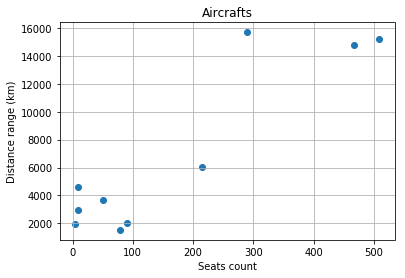

In [2]:
X=np.array([(4,1940),(9,2960),(9,4630),(78,1528),(90,2040),(50,3700),(467,14815),(509,15200),(290,15700),(215,6045)])

x1 = np.array(X[:,0])
x2 = np.array(X[:,1])

fig, ax = plt.subplots()
ax.scatter(x1,x2)
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts')
ax.grid()
plt.show()

In [3]:
data = np.array(X)
X_norm = data/data.max(0)

In [4]:
print(X_norm)

[[ 0.00785855  0.12356688]
 [ 0.01768173  0.18853503]
 [ 0.01768173  0.29490446]
 [ 0.15324165  0.09732484]
 [ 0.17681729  0.12993631]
 [ 0.09823183  0.23566879]
 [ 0.91748527  0.94363057]
 [ 1.          0.96815287]
 [ 0.5697446   1.        ]
 [ 0.42239686  0.38503185]]


## Fuzzy k-means

In [5]:
centers = []
groups = 2 

def select_centers():
    global centers
    global groups
    
    counter = 0
    while counter < groups:
        centers.append((random.random(), random.random()))
        counter += 1
select_centers()

In [6]:
data_set = X_norm

m = 2.0
error_margin = 0.01

assignation=np.zeros((len(X),groups))
centers=[]
select_centers()

In [7]:
def calculate_distance(x,v):
    return math.sqrt((x[0]-v[0])**2+(x[1]-v[1])**2)

In [8]:
def calculate_new_centers(u):
    global centers
    new_centers=[]
    for c in range(groups):
        u_x_vector=np.zeros(2)
        u_scalar=0.0
        for i in range(len(data_set)):
            u_scalar = u_scalar+(u[i][c]**m)
            u_x_vector=np.add(u_x_vector,np.multiply(u[i][c]**m,data_set[i]))
        new_centers.append(np.divide(u_x_vector,u_scalar))
    centers=new_centers

In [9]:
def calculate_differences(new_assignation):
    global assignation    
    return np.sum(np.abs(np.subtract(assignation,new_assignation)))

In [10]:
def calculate_u(x,i):
    global centers
    if i == 0:
        sum=1.0+(calculate_distance(x, centers[0])/calculate_distance(x, centers[1]))**2
    else:
        sum=1.0+(calculate_distance(x, centers[1])/calculate_distance(x, centers[0]))**2
    return sum**-1

In [11]:
print(centers)

[(0.1431550842947421, 0.8718151968221924), (0.643669758221887, 0.9745834587359893)]


In [12]:
def cluster():
    global assignation    
    global error_margin    
    global groups
    difference_limit_not_achieved=True
    iter=0
    while difference_limit_not_achieved:
        new_assignation=[]
        for i in range(len(data_set)):
            new_assignation_vector=[]
            for k in range(groups):
                new_assignation_vector.append(calculate_u(data_set[i],k))
            new_assignation.append(new_assignation_vector)
        calculate_new_centers(new_assignation)

        if iter>0:
            if calculate_differences(new_assignation) < error_margin:
                difference_limit_not_achieved=False
        assignation=new_assignation
        iter=iter+1

In [13]:
cluster()

In [14]:
print(centers)

[array([ 0.1124021 ,  0.19895626]), array([ 0.83354829,  0.96018437])]


In [15]:
print(assignation)

[[0.9881297751471932, 0.01187022485280676], [0.9928586719632815, 0.007141328036718628], [0.983860644249144, 0.016139355750856045], [0.9901617330870529, 0.009838266912947187], [0.9921052273989537, 0.007894772601046285], [0.9985472103114951, 0.0014527896885049147], [0.006068076982786611, 0.9939319230172134], [0.019766661303278678, 0.9802333386967212], [0.07711114759077196, 0.922888852409228], [0.792567947111039, 0.20743205288896097]]


In [16]:
red = X_norm[np.where(np.array(assignation)[:,0]>0.5)]
blue = X_norm[np.where(np.array(assignation)[:,1]>0.5)]

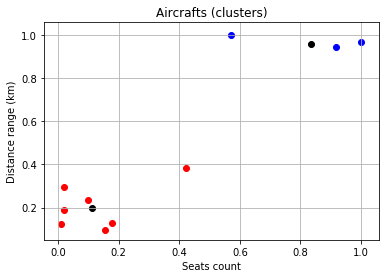

In [17]:
fig, ax = plt.subplots()

ax.scatter(blue[:,0],blue[:,1],c='blue')
ax.scatter(red[:,0],red[:,1],c='red')
ax.scatter(np.array(centers)[:,0],np.array(centers)[:,1],c='black')
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts (clusters)')
ax.grid()
plt.show()

## Possibilistic K-means

In [18]:
data_set = X_norm

error_rate = 0.01
m = 2.0
groups = 2
assignation = np.random.rand(len(X), groups)

In [19]:
print(assignation)

[[ 0.00988264  0.57442739]
 [ 0.65975375  0.67088012]
 [ 0.80014957  0.65514621]
 [ 0.73966782  0.9642712 ]
 [ 0.05630767  0.92799352]
 [ 0.27520103  0.01862791]
 [ 0.00196489  0.8930791 ]
 [ 0.62347303  0.20636175]
 [ 0.36319806  0.25836037]
 [ 0.76838583  0.06891387]]


Select centers randomly

In [20]:
centers = []

def select_centers():
    global centers
    global groups
    
    counter = 0
    while counter < groups:
        centers.append((random.random(), random.random()))
        counter += 1
select_centers()

In [21]:
print(centers)

[(0.48386058040290925, 0.7258931432994293), (0.19593635844854296, 0.5825879541673041)]


In [22]:
def calculate_new_centers(u):
    global centers
    new_centers=[]
    for c in range(groups):
        u_x_vector=np.zeros(2)
        u_scalar=0.0
        for i in range(len(data_set)):
            u_scalar = u_scalar+(u[i][c]**m)
            u_x_vector=np.add(u_x_vector,np.multiply(u[i][c]**m,data_set[i]))
        new_centers.append(np.divide(u_x_vector,u_scalar))
    centers=new_centers

#### Calculate mahalanobis distance:

\begin{equation}
 d =  \sqrt{(x - v)^T * C^{-1} * (x - v)}   ,
\end{equation}

where C is a covariance matrix

In [23]:
def mahalanobis_distance(point, center, cov_inv):
    assert len(point) == 2, "mahal_dist function is defined for 2 dimensional elements"
    assert len(center) == 2, "mahal_dist function is defined for 2 dimensional elements"
#     diff = np.subtract(x, v)
#     arr = np.vstack([x, v])
#     covariance = np.cov(arr.T)
#     cov_inv = np.linalg.inv(covariance)
    x = np.asarray(point)
    y = np.asarray(center)
    diff = np.subtract(point, center)
    distance = np.dot(np.dot(diff, cov_inv), diff.T)
    if distance > 0:
        distance = math.sqrt(distance)
    else:
        print("Something is wrong, the value should be positive to allow square operation")
    return distance

#### Calculate assignation matrix in possibilistic k-means (PCM):
    
\begin{equation}
 \mu_{ik}= (1 + (\frac {D_{ikA}} {\eta_i}) ^ \frac {2} {m-1} ) ^{-1},
\end{equation}

Where possibilistic distribution measure:

\begin{equation}
 \eta_i = \frac {\sum_{k=1}^{M}(\mu_{ik})^m D_{ikA}^2} {\sum_{k=1}^{M}(\mu_{ik})^m},
\end{equation}

and 

\begin{equation}
 D_{ikA}^2 = \|x_k - v_i\|_A^2 = (x_k - v_i)^T A (x_k - v_i)
\end{equation}



I'm guessing this distance D is exactly *mahalanobis_distance*

In [24]:
def calculate_eta(u, cov_inv):
    global m
    global centers
    global groups
    
    eta = []
    for i in range(len(data_set)):
        numerator = 0.0
        denominator = 0.0
        for g in range(groups):
#             numerator += (u[i][g] ** m) * (mahalanobis_distance(g, i) ** 2)
            numerator += (u[i][g] ** m) * (mahalanobis_distance(data_set[i], centers[g], cov_inv) ** 2)
            denominator += (u[i][g] ** m)
        eta.append(np.divide(numerator, denominator))
    return eta

In [25]:
def calculate_u(distance, eta):
    global centers
    global m
    fraction = np.divide(distance, eta)
    result = 1 + fraction ** (2 / (m - 1))
    return result ** (-1)

In [26]:
def calculate_differences(new_assignation):
    global assignation    
    print("CALCULATE\n", assignation)
    print(new_assignation)
    return np.sum(np.abs(np.subtract(assignation,new_assignation)))

In [27]:
def cluster():
    global assignation
    global error_rate
    global groups
    difference_limit_not_achieved = True
    iters = 0
    
    arr = np.asarray(data_set).T
    C_matrix = np.cov(arr)
    C_inv = np.linalg.inv(C_matrix)
    
    while difference_limit_not_achieved:
        new_assignation = []
        eta = calculate_eta(assignation, C_inv)
        
        for i in range(len(data_set)):
            new_assignation_vector=[]
            
            for g in range(groups):
                distance = mahalanobis_distance(data_set[i], centers[g], C_inv)
                print("Dist: ", g, " is ", distance, ' ', centers[g])
                new_assignation_vector.append(calculate_u(distance, eta[i]))

            new_assignation.append(new_assignation_vector)
        print('out loop')    
        calculate_new_centers(new_assignation)
        
        if iters > 0:
            if calculate_differences(new_assignation) < error_rate:
                difference_limit_not_achieved = False
        assignation = new_assignation
        iters+=1

In [28]:
cluster()

Dist:  0  is  1.646726400208645   (0.48386058040290925, 0.7258931432994293)
Dist:  1  is  1.878332828883961   (0.19593635844854296, 0.5825879541673041)
Dist:  0  is  1.4244258637501905   (0.48386058040290925, 0.7258931432994293)
Dist:  1  is  1.5323663462901067   (0.19593635844854296, 0.5825879541673041)
Dist:  0  is  1.24287246303742   (0.48386058040290925, 0.7258931432994293)
Dist:  1  is  0.9178486022163089   (0.19593635844854296, 0.5825879541673041)
Dist:  0  is  2.2371007955376485   (0.48386058040290925, 0.7258931432994293)
Dist:  1  is  2.819011294705942   (0.19593635844854296, 0.5825879541673041)
Dist:  0  is  2.14864718099268   (0.48386058040290925, 0.7258931432994293)
Dist:  1  is  2.7476507715751493   (0.19593635844854296, 0.5825879541673041)
Dist:  0  is  1.3432009302468573   (0.48386058040290925, 0.7258931432994293)
Dist:  1  is  1.6458757175001264   (0.19593635844854296, 0.5825879541673041)
Dist:  0  is  1.6187343261078477   (0.48386058040290925, 0.7258931432994293)
Dist: 

Dist:  1  is  1.3651609073618924   [ 0.41972928  0.53854143]
Dist:  0  is  1.6436652761402157   [ 0.43185951  0.54888088]
Dist:  1  is  1.6753727851699682   [ 0.41972928  0.53854143]
Dist:  0  is  2.0832800967833403   [ 0.43185951  0.54888088]
Dist:  1  is  2.0844372715172153   [ 0.41972928  0.53854143]
Dist:  0  is  0.9800351503006437   [ 0.43185951  0.54888088]
Dist:  1  is  0.9846163291287253   [ 0.41972928  0.53854143]
out loop
CALCULATE
 [[0.51245745532529219, 0.52983400065520447], [0.49880382297430859, 0.5181540783530153], [0.62659339964759531, 0.63903877848453061], [0.642523700200063, 0.64605393766908636], [0.60980417642068063, 0.61347339107629806], [0.37067511462381558, 0.39376064680425132], [0.67433636253520801, 0.66202063979100179], [0.75105688902326684, 0.74242078219802421], [0.82327236840538942, 0.82333667947453604], [0.46520848427272177, 0.45868340930415435]]
[[0.557618457917606, 0.57084535161264072], [0.53709134300314421, 0.55190208198285817], [0.63864926059551752, 0.6485

Dist:  0  is  1.6656749772862491   [ 0.42030403  0.53560605]
Dist:  1  is  1.678917648187221   [ 0.41499132  0.53078065]
Dist:  0  is  2.1056014409385644   [ 0.42030403  0.53560605]
Dist:  1  is  2.108069150490462   [ 0.41499132  0.53078065]
Dist:  0  is  0.9627505005227943   [ 0.42030403  0.53560605]
Dist:  1  is  0.9631989214617818   [ 0.41499132  0.53078065]
out loop
CALCULATE
 [[0.53195923573657267, 0.53969529016138262], [0.51441664081775185, 0.52263002577642848], [0.63017571568483954, 0.63506792158252412], [0.65649572777729504, 0.65900335876560967], [0.62521074106542207, 0.62790720117532706], [0.3930100007283262, 0.40310152116274206], [0.6652926283059083, 0.65989953989020822], [0.74591775027039564, 0.74229578102068716], [0.81840268633193314, 0.81798199039659092], [0.47855746557177725, 0.47776854091401827]]
[[0.55040377233806737, 0.55654801751161487], [0.53273816183146838, 0.53925289242422036], [0.63970687118750891, 0.64363808133110134], [0.66462788938079331, 0.666786895374883], [0

Dist:  0  is  1.677500668164868   [ 0.41522091  0.53062782]
Dist:  1  is  1.683306923148774   [ 0.41286355  0.52845352]
Dist:  0  is  2.1101980393286954   [ 0.41522091  0.53062782]
Dist:  1  is  2.1115247385627582   [ 0.41286355  0.52845352]
Dist:  0  is  0.9608943250726993   [ 0.41522091  0.53062782]
Dist:  1  is  0.9609469491795357   [ 0.41286355  0.52845352]
out loop
CALCULATE
 [[0.53971556144653343, 0.54315490734602456], [0.5220296241820509, 0.52563257767675953], [0.63398118608529563, 0.63608165916195325], [0.65999566238497165, 0.66121732700938818], [0.62902773333348716, 0.6303484184099083], [0.40281485424736857, 0.40728623333560526], [0.66046230562356811, 0.65805228831515472], [0.74280668221099011, 0.74120476284531422], [0.81745842961843362, 0.81722506858838018], [0.4798600632607874, 0.47974423813806433]]
[[0.54773971976007918, 0.55051374674749343], [0.53030300787216567, 0.53320832741684754], [0.63866137627386221, 0.64036717535988874], [0.66308097695882473, 0.66409541140557393], [

Dist:  1  is  1.6855487197786427   [ 0.41191421  0.52753592]
Dist:  0  is  2.1117053038712417   [ 0.41296336  0.52850727]
Dist:  1  is  2.1123237528480807   [ 0.41191421  0.52753592]
Dist:  0  is  0.9607020826085759   [ 0.41296336  0.52850727]
Dist:  1  is  0.9607148590073878   [ 0.41191421  0.52753592]
out loop
CALCULATE
 [[0.54304986625242724, 0.54457915489705144], [0.52545814172631011, 0.52705493324029162], [0.63590004815394729, 0.63682704747090702], [0.66128120379364019, 0.66183761955216946], [0.63042260464851207, 0.63102501049268966], [0.40712446697493193, 0.40911220899607659], [0.65819378948921203, 0.65711518641948563], [0.74131255305489807, 0.7405975169046034], [0.81717718008522489, 0.81706886598606854], [0.47996745199750462, 0.47994470272724787]]
[[0.54660212920518325, 0.54784433317657866], [0.52915339544904927, 0.53045056960742287], [0.63803113076919726, 0.63878694230471456], [0.66260023154887893, 0.66305744278428014], [0.63185216240900688, 0.63234772102701131], [0.41173701410

Dist:  0  is  2.112322695560266   [ 0.41195858  0.52757294]
Dist:  1  is  2.1126017895304   [ 0.41149121  0.52713982]
Dist:  0  is  0.9606884803360798   [ 0.41195858  0.52757294]
Dist:  1  is  0.9606940612077701   [ 0.41149121  0.52713982]
out loop
CALCULATE
 [[0.54451928050299847, 0.54519995361734119], [0.52698574653498576, 0.52769593633431511], [0.63677794744202443, 0.63719006360153818], [0.66182617583940917, 0.66207559477084055], [0.63101316950503605, 0.63128333722630037], [0.4090331903616472, 0.40991813168045077], [0.65716582037453763, 0.6566838579851435], [0.7406324026027018, 0.74031313349414429], [0.81706734218200117, 0.81701871264777337], [0.47996878603683291, 0.47996251047634414]]
[[0.54609935034848234, 0.54665403866314033], [0.52863292204817369, 0.52921172794225946], [0.63773249929067399, 0.63806896601340535], [0.66240830902512859, 0.662612544158793], [0.63164393077859282, 0.63186526332311765], [0.41108733917043355, 0.41180915769022264], [0.65604607460993869, 0.655650440572903

In [29]:
print(centers)

[array([ 0.41151102,  0.52715774]), array([ 0.41130275,  0.52696469])]


In [30]:
print(assignation)

[[0.54517171648941842, 0.54547489214880451], [0.52766579393131685, 0.52798206826477145], [0.63717153300295093, 0.63735509461003625], [0.6620662747077688, 0.66217762510897005], [0.63127330394857917, 0.63139393955005541], [0.40988158406585418, 0.41027581816740333], [0.65670497676143191, 0.65648988098336869], [0.74032723309387871, 0.74018477857550702], [0.81702013346230185, 0.81699844108715336], [0.4799652163262626, 0.47996298910138935]]


In [31]:
red = X_norm[np.where(np.array(assignation)[:,0]>0.5)]
blue = X_norm[np.where(np.array(assignation)[:,1]>0.5)]

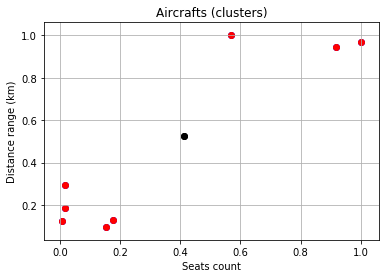

In [32]:
fig, ax = plt.subplots()

ax.scatter(blue[:,0],blue[:,1],c='blue')
ax.scatter(red[:,0],red[:,1],c='red')
ax.scatter(np.array(centers)[:,0],np.array(centers)[:,1],c='black')
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts (clusters)')
ax.grid()
plt.show()
